# Assignment 02

Name:Athulitha Yashaswini

Roll Number:12040610

References Used to Complete the Assignment

1.Pandas documentation
2.Numpy documentation
3.scikit-learn.org

Average no.of hours spent per day to complete the assignment are 6.



## Part A: Multi-Class Classification

Captchas were invented to prevent bots from attacking websites. But the ML models are breaking captchas. Thus, stronger captchas are being invented. In this part, we will train a ML model to break hcaptcha (https://www.hcaptcha.com/ )!!

Please download the following dataset: https://github.com/sarang-iitb/H-captcha-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import glob
import os
import cv2
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
from sklearn.linear_model import LogisticRegression

In [ ]:
train_dir="hcaptcha_dataset\\hcaptcha_dataset\\train"
test_dir="hcaptcha_dataset\\hcaptcha_dataset\\test"

In [ ]:
def data(path):
    lst_of_classes=['airplane', 'bicycle', 'boat', 'motorbus', 'motorcycle', 'seaplane','truck']
    temp= pd.DataFrame(columns = ['path', 'target'])
    for target in lst_of_classes:
        cls_imgs = glob.glob((f"{path}\\{target}\\*.jpg"))
        df = pd.DataFrame({
                'path': cls_imgs,
                'target': [target]*len(cls_imgs),
            })
        temp=pd.concat([temp,df],ignore_index = True)
    return temp

In [ ]:
trdata=data(train_dir)
tstdata=data(test_dir)

### 1. Data Cleaning and Visualization

a) Check out the labels in the dataset. How many images belong to each class?

In [ ]:
trdata["target"].value_counts()

truck         656
motorcycle    592
boat          527
airplane      402
bicycle       304
seaplane      280
motorbus      256
Name: target, dtype: int64

In [ ]:
tstdata["target"].value_counts()

truck         163
motorcycle    141
boat          134
airplane      101
seaplane       75
bicycle        71
motorbus       61
Name: target, dtype: int64

b) How many train and test images are present in your dataset?

In [ ]:
print(f"no.of training images are {trdata.shape[0]}\nno.of test images are {tstdata.shape[0]}")

no.of training images are 3017
no.of test images are 746


c) Write a function to display a random image and its shape. Find out whether
the shape of each image is the same or not. If not then make all images of the
same shape.

In [ ]:
rnd_sample=trdata.sample().values
rnd_sample

array([['hcaptcha_dataset\\hcaptcha_dataset\\train\\bicycle\\1650202476389_12.jpg',
        'bicycle']], dtype=object)

In [ ]:
def rand_img_shape(path,target):
    img = cv2.imread(path)
    print(img.shape)
    plt.title(target)
    plt.imshow(img)



(128, 128, 3)


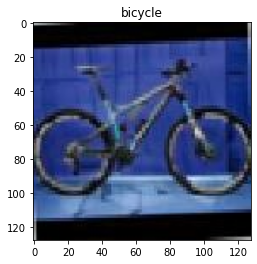

In [ ]:
rand_img_shape(rnd_sample[0,0],rnd_sample[0,1])

In [ ]:
#shape check
def shape_check(path):
    Image=cv2.imread(path)
    if Image.shape!=(128,128,3):
        return 1

In [ ]:
#checking,whether all the images are of same shape or not
temp_var=0
for p in trdata["path"].values:
    if shape_check(p):
        temp_var=1
        print("not all images have same size")
        break
if temp_var==0:
        print("all images have same size")

all images have same size


In [ ]:
#changing shape of all the images to same shape
def Image_shape_change(path):
    img = cv2.imread(path)
    if img.shape!= (128, 128, 3):
        img = img[:128, :128]
    return img

In [ ]:
trdata["ch_img"]=trdata["path"].apply(Image_shape_change)
trdata["ch_img"].iloc[0]

array([[[174, 112,  42],
        [175, 113,  43],
        [176, 114,  44],
        ...,
        [178, 119,  50],
        [179, 120,  51],
        [179, 120,  51]],

       [[174, 112,  42],
        [175, 113,  43],
        [176, 114,  44],
        ...,
        [178, 119,  50],
        [179, 120,  51],
        [179, 120,  51]],

       [[175, 113,  43],
        [176, 114,  44],
        [176, 114,  44],
        ...,
        [178, 119,  50],
        [178, 119,  50],
        [178, 119,  50]],

       ...,

       [[145, 145, 145],
        [142, 142, 142],
        [100, 100, 100],
        ...,
        [ 85,  83,  83],
        [ 84,  82,  82],
        [ 84,  82,  82]],

       [[128, 128, 128],
        [124, 124, 124],
        [ 80,  80,  80],
        ...,
        [ 69,  67,  67],
        [ 79,  77,  77],
        [ 86,  84,  84]],

       [[132, 132, 132],
        [127, 127, 127],
        [ 82,  82,  82],
        ...,
        [ 64,  62,  62],
        [ 76,  74,  74],
        [ 83,  81,  81]]

In [ ]:
#cross checking after reshaping the images
def shape_check_after_change(img):
    if img.shape!=(128,128,3):
        return 1

for p in trdata["ch_img"].values:
    a=0
    if shape_check_after_change(p):
        print("not all image have same shape")
        a=1
if not a:
    print("all images have same shape")

all images have same shape


d) Do you think removing color channels (R, G, B) from images would lead to
poor modeling? How can you justify converting each image to greyscale? What
will be the effect of using a colored 3-channel image over a grayscale one on the classification model’s performance?

In [ ]:
def greyscale(img):
    gray_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img
trdata["ch_gimg"]=trdata["ch_img"].apply(greyscale)
print(f"changed all images to grayscale")

changed all images to grayscale


In [ ]:
trdata["ch_gimg"].iloc[0]

array([[ 98,  99, 100, ..., 105, 106, 106],
       [ 98,  99, 100, ..., 105, 106, 106],
       [ 99, 100, 100, ..., 105, 105, 105],
       ...,
       [145, 142, 100, ...,  83,  82,  82],
       [128, 124,  80, ...,  67,  77,  84],
       [132, 127,  82, ...,  62,  74,  81]], dtype=uint8)

e) Should you normalize your color channel values? Based on your answers do
the steps you think will be best for your model.

Yes,we can normalize the color channel values.
To normalize color channel values I am dividing the values by max value i,e.255.Hence all the color channel values will be between (0,1).

In [ ]:
#normalizing coloured image
trdata["nor_img"]=trdata["ch_img"].apply(lambda x:x/255)
trdata["nor_img"].iloc[0]

array([[[0.68235294, 0.43921569, 0.16470588],
        [0.68627451, 0.44313725, 0.16862745],
        [0.69019608, 0.44705882, 0.17254902],
        ...,
        [0.69803922, 0.46666667, 0.19607843],
        [0.70196078, 0.47058824, 0.2       ],
        [0.70196078, 0.47058824, 0.2       ]],

       [[0.68235294, 0.43921569, 0.16470588],
        [0.68627451, 0.44313725, 0.16862745],
        [0.69019608, 0.44705882, 0.17254902],
        ...,
        [0.69803922, 0.46666667, 0.19607843],
        [0.70196078, 0.47058824, 0.2       ],
        [0.70196078, 0.47058824, 0.2       ]],

       [[0.68627451, 0.44313725, 0.16862745],
        [0.69019608, 0.44705882, 0.17254902],
        [0.69019608, 0.44705882, 0.17254902],
        ...,
        [0.69803922, 0.46666667, 0.19607843],
        [0.69803922, 0.46666667, 0.19607843],
        [0.69803922, 0.46666667, 0.19607843]],

       ...,

       [[0.56862745, 0.56862745, 0.56862745],
        [0.55686275, 0.55686275, 0.55686275],
        [0.39215686, 0

In [ ]:
#normalizing gray image
trdata["ch_nor_gimg"]=trdata["ch_gimg"].apply(lambda x:x/255)


In [ ]:
trdata["ch_nor_gimg"].iloc[0]

array([[0.38431373, 0.38823529, 0.39215686, ..., 0.41176471, 0.41568627,
        0.41568627],
       [0.38431373, 0.38823529, 0.39215686, ..., 0.41176471, 0.41568627,
        0.41568627],
       [0.38823529, 0.39215686, 0.39215686, ..., 0.41176471, 0.41176471,
        0.41176471],
       ...,
       [0.56862745, 0.55686275, 0.39215686, ..., 0.3254902 , 0.32156863,
        0.32156863],
       [0.50196078, 0.48627451, 0.31372549, ..., 0.2627451 , 0.30196078,
        0.32941176],
       [0.51764706, 0.49803922, 0.32156863, ..., 0.24313725, 0.29019608,
        0.31764706]])

f) Visualize 3 random training images along with the labels for each class. The
dataset was manually labeled, do you spot any errors in the labels?

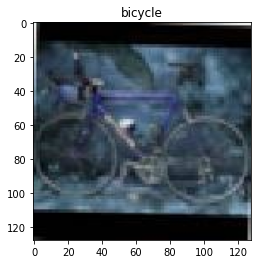

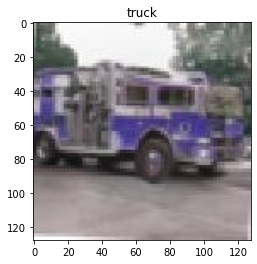

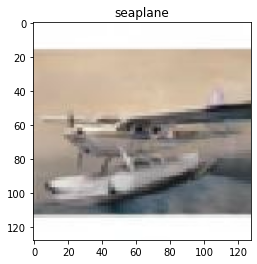

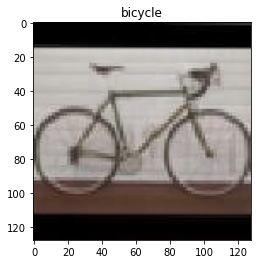

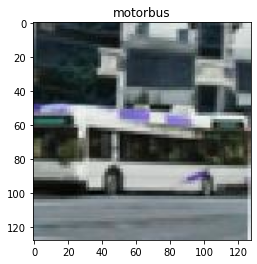

In [ ]:
#visualising images
def show_img(path,target):
    img = cv2.imread(path)
    plt.title(target)
    plt.imshow(img)
    plt.show()
for i in range(5):
    temp=trdata.sample().values
    show_img(temp[0,0],temp[0,1])

In [ ]:
trdata.sample()

,path,target,ch_img,ch_gimg,nor_img,ch_nor_gimg
1139,hcaptcha_dataset\hcaptcha_dataset\train\boat\1...,boat,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


### 2. Preparing Balanced Samples for Training using only the Training set provided to you.

a) Do you think if you apply cross-validation to the dataset then all the crossvalidation folds will be similar? Why or why not?

b) What can you do to ensure that every fold contains images from each class and no duplicates? Do the needful on your dataset that will ensure similar crossvalidation folds.

In [ ]:
trdata["label"]=LabelEncoder().fit_transform(trdata["target"])
trdata["label"]

0       0
1       0
2       0
3       0
4       0
       ..
3012    6
3013    6
3014    6
3015    6
3016    6
Name: label, Length: 3017, dtype: int32

In [ ]:
trdata["ch_nor_gimg"][0]

array([[0.38431373, 0.38823529, 0.39215686, ..., 0.41176471, 0.41568627,
        0.41568627],
       [0.38431373, 0.38823529, 0.39215686, ..., 0.41176471, 0.41568627,
        0.41568627],
       [0.38823529, 0.39215686, 0.39215686, ..., 0.41176471, 0.41176471,
        0.41176471],
       ...,
       [0.56862745, 0.55686275, 0.39215686, ..., 0.3254902 , 0.32156863,
        0.32156863],
       [0.50196078, 0.48627451, 0.31372549, ..., 0.2627451 , 0.30196078,
        0.32941176],
       [0.51764706, 0.49803922, 0.32156863, ..., 0.24313725, 0.29019608,
        0.31764706]])

In [ ]:
trdata["ch_nor_gimg"]=trdata["ch_nor_gimg"].apply(lambda x: x.flatten())
trdata["ch_nor_gimg"][0]

array([0.38431373, 0.38823529, 0.39215686, ..., 0.24313725, 0.29019608,
       0.31764706])

a) Do you think if you apply cross-validation to the dataset then all the crossvalidation folds will be similar? Why or why not?

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(shuffle = True)
f=0
for train_idx, test_idx in kfold.split(trdata['path'], trdata['label']):
    test = trdata.loc[test_idx]
    train = trdata.loc[train_idx]
    train_count = train.target.value_counts()['truck']
    test_count = test.target.value_counts()['truck']
    print(f"In Fold {f} - count of truck in train is{train_count},in test is {test_count} ")
    f+= 1

In Fold 0 - count of truck in train is525,in test is 131 
In Fold 1 - count of truck in train is524,in test is 132 
In Fold 2 - count of truck in train is525,in test is 131 
In Fold 3 - count of truck in train is525,in test is 131 
In Fold 4 - count of truck in train is525,in test is 131 


### 3. Is Logistic regression a good algorithm for your dataset? Why or why not Based on the classification algorithms taught in class, which algorithms can be used to solve this problem?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
def logiRegr(df):
    model=LogisticRegression(multi_class='ovr')
    kfold = StratifiedKFold(n_splits=3,shuffle = True)
    i=0
    for  train_idx, test_idx in kfold.split(trdata['ch_nor_gimg'], trdata['label']):
        i+=1
        test = trdata.loc[test_idx]
        train = trdata.loc[train_idx]
        model.fit(np.stack(train["ch_nor_gimg"].values),train["label"])
        ypred=model.predict(np.stack(test["ch_nor_gimg"].values))
        accuracy=np.mean(ypred==np.array(test["label"]))
        print(f"for fold-{i} accuracy is {accuracy*100}")


In [ ]:
logiRegr(trdata)

for fold-1 accuracy is 70.67594433399603
for fold-2 accuracy is 72.66401590457257
for fold-3 accuracy is 72.43781094527363


### 4. Train the KNN classifier algorithm on the training dataset. Don’t use the test set at this time.

a) What distance/similarity function should we use for comparing images?
Compare at least 3 different metrics on a few random samples to get some
understanding of how they work.

In [ ]:
#knn
def accuracy_score(ytest,ypred):
    c=0
    for i in range(len(ytest)):
        if ytest[i]==ypred[i]:
            c+=1
    return c/len(ytest)


In [ ]:
#using distance euclidean distance metic
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4,p=2)
f=0
for train_idx, test_idx in kfold.split(trdata["ch_nor_gimg"],trdata["label"]):
    test = trdata.loc[test_idx]
    train = trdata.loc[train_idx]
    xtr=[]
    xte=[]
    for i in range(len(train)):
        xtr.append(train["ch_nor_gimg"].iloc[i])
    for i in range(len(test)):
        xte.append(test["ch_nor_gimg"].iloc[i])

    knn.fit(np.array(xtr),train["label"])
    y_pred=knn.predict(np.array(xte))
    ac=accuracy_score(np.array(test["label"]), y_pred)
    print(f"KNN-Classifier Multi-class Set-Accuracy for fold-{f} is {ac*100}")
    f+=1


KNN-Classifier Multi-class Set-Accuracy for fold-0 is 70.52980132450331
KNN-Classifier Multi-class Set-Accuracy for fold-1 is 67.71523178807946
KNN-Classifier Multi-class Set-Accuracy for fold-2 is 67.99336650082918
KNN-Classifier Multi-class Set-Accuracy for fold-3 is 71.31011608623548
KNN-Classifier Multi-class Set-Accuracy for fold-4 is 74.29519071310115


In [ ]:
#using manhattan distance metric
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4,p=1)
f=0
for train_idx, test_idx in kfold.split(trdata["ch_nor_gimg"],trdata["label"]):
    test = trdata.loc[test_idx]
    train = trdata.loc[train_idx]
    xtr=[]
    xte=[]
    for i in range(len(train)):
        xtr.append(train["ch_nor_gimg"].iloc[i])
    for i in range(len(test)):
        xte.append(test["ch_nor_gimg"].iloc[i])

    knn.fit(np.array(xtr),train["label"])
    y_pred=knn.predict(np.array(xte))
    ac=accuracy_score(np.array(test["label"]), y_pred)
    print(f"KNN-Classifier Multi-class Set-Accuracy for fold-{f} is {ac*100}")
    f+=1


KNN-Classifier Multi-class Set-Accuracy for fold-0 is 74.17218543046357
KNN-Classifier Multi-class Set-Accuracy for fold-1 is 72.84768211920529
KNN-Classifier Multi-class Set-Accuracy for fold-2 is 77.61194029850746
KNN-Classifier Multi-class Set-Accuracy for fold-3 is 76.11940298507463
KNN-Classifier Multi-class Set-Accuracy for fold-4 is 72.96849087893864


b) What is the impact of increasing K on the speed and accuracy of the
algorithm?

c) Choose a good value of K and the distance metric based on cross-validation.

### 5. Train SVM classifiers on the dataset. Don’t use the test set at this time.

a) Which kernel functions can be used for this dataset? Why?

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(trdata["ch_nor_gimg"],
                                                trdata["label"],
                                         test_size=0.35, random_state=48)
svm_xtrain=np.stack(xtrain.values)
svm_xtest=np.stack(xtest.values)
svm_ytrain=np.stack(ytrain.values)
svm_ytest=np.stack(ytest.values)
#Linear_Svc
svc1=svm.SVC()
svc1.fit(svm_xtrain,svm_ytrain)
ypred = svc1.predict(svm_xtest)
accuracy=accuracy_score(svm_ytest,ypred)
print(f"accuracy for linear kernel_Svc is {accuracy*100}")

accuracy for linear kernel_Svc is 82.29166666666666


In [ ]:
#RFB kernel
svc_2=svm.SVC(kernel='rbf')
svc_2.fit(svm_xtrain,svm_ytrain)
ypred = svc_2.predict(svm_xtest)
accuracy=np.mean(ypred==svm_ytest)
print(f"accuracy for RFB kernel_Svc is {accuracy*100}")

accuracy for RFB kernel_Svc is 82.29166666666666


In [ ]:
#polynomial kernel
svc_3=svm.SVC(kernel='poly',degree=2)
svc_3.fit(svm_xtrain,svm_ytrain)
ypred = svc_3.predict(svm_xtest)
accuracy=np.mean(ypred==svm_ytest)
print(f"accuracy for polynomial kernel_Svc is {accuracy*100}")

accuracy for polynomial kernel_Svc is 79.82954545454545


b) Which of the SVM implementations (SVC, SGDClassifier, NuSVC and LinearSVC)
is the best for this dataset? Why?


In [ ]:
#SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(svm_xtrain,svm_ytrain)
ypred=clf.predict(svm_xtest)
acc = np.mean(ypred == svm_ytest)
print(f"SGDClassifier Accuracy - {acc*100}")

SGDClassifier Accuracy - 68.84469696969697


In [ ]:
#NuSvc
svc_4= svm.NuSVC(kernel='linear')
svc_4.fit(svm_xtrain,svm_ytrain)
ypred = svc_4.predict(svm_xtest)

acc = np.mean(ypred == svm_ytest)
print(f"NuSVC Linear Kernel Accuracy - {acc*100}")

NuSVC Linear Kernel Accuracy - 71.875


In [ ]:
#LinearSVC
svc_5=svm.LinearSVC(tol=1e-05)
svc_5.fit(svm_xtrain,svm_ytrain)
ypred = svc_5.predict(svm_xtest)

acc = np.mean(ypred == svm_ytest)
print(f"LinearSVC Accuracy - {acc*100}")

LinearSVC Accuracy - 65.3409090909091


c) Finalize your SVM model based on cross-validation


In [ ]:
#Finalizing model based on cross validation.
knn=KNeighborsClassifier(n_neighbors=4,p=1)#p=1 represents manhattan distance metric.
svc1=svm.SVC()
f=0
for train_idx, test_idx in kfold.split(trdata["ch_nor_gimg"],trdata["label"]):
    test = trdata.loc[test_idx]
    train = trdata.loc[train_idx]
    knn.fit(np.stack(train["ch_nor_gimg"].values),train["label"])
    y_knn_pred=knn.predict(np.stack(test["ch_nor_gimg"].values))
    acknn=accuracy_score(np.array(test["label"].values), y_knn_pred)


    svc1.fit(np.stack(train["ch_nor_gimg"].values),train["label"])
    y_SVC_pred = svc1.predict(np.stack(test["ch_nor_gimg"].values))
    accSVC=accuracy_score(np.array(test["label"].values),y_SVC_pred)
    print(f"KNN-Classifier Multi-class Set-Accuracy for fold-{f} is {acknn*100}")
    print(f"SVC-Accuracy for fold-{f} is {accSVC*100}")
    f+=1


KNN-Classifier Multi-class Set-Accuracy for fold-0 is 75.16556291390728
SVC-Accuracy for fold-0 is 81.62251655629139
KNN-Classifier Multi-class Set-Accuracy for fold-1 is 75.33112582781457
SVC-Accuracy for fold-1 is 86.75496688741721
KNN-Classifier Multi-class Set-Accuracy for fold-2 is 74.7927031509121
SVC-Accuracy for fold-2 is 85.90381426202322
KNN-Classifier Multi-class Set-Accuracy for fold-3 is 74.12935323383084
SVC-Accuracy for fold-3 is 81.92371475953566
KNN-Classifier Multi-class Set-Accuracy for fold-4 is 75.12437810945273
SVC-Accuracy for fold-4 is 83.5820895522388


### 6. Evaluate and compare the classification models on the test set provided to you

a) Calculate the classification accuracy of both the models and compare

In [ ]:
tstdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    746 non-null    object
 1   target  746 non-null    object
dtypes: object(2)
memory usage: 11.8+ KB


In [ ]:
tstdata["img"]=tstdata["path"].apply(lambda x:cv2.imread(x))

In [ ]:
tstdata["img"]=tstdata["img"].apply(lambda x:x[:128,:128])

In [ ]:
tstdata["gimg"]=tstdata["img"].apply(lambda x:cv2.cvtColor(x, cv2.COLOR_BGR2GRAY))

In [ ]:
tstdata.sample(5)

,path,target,img,gimg
458,hcaptcha_dataset\hcaptcha_dataset\test\motorcy...,motorcycle,"[[[239, 242, 246], [234, 237, 241], [189, 192,...","[[243, 238, 193, 192, 185, 190, 187, 189, 189,..."
198,hcaptcha_dataset\hcaptcha_dataset\test\boat\16...,boat,"[[[240, 234, 227], [255, 245, 238], [126, 110,...","[[233, 244, 110, 115, 97, 98, 95, 102, 100, 10..."
521,hcaptcha_dataset\hcaptcha_dataset\test\seaplan...,seaplane,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
658,hcaptcha_dataset\hcaptcha_dataset\test\truck\1...,truck,"[[[149, 144, 153], [151, 146, 155], [153, 148,...","[[147, 149, 151, 151, 150, 148, 147, 148, 146,..."
402,hcaptcha_dataset\hcaptcha_dataset\test\motorcy...,motorcycle,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [ ]:
tstdata["gimg"]=tstdata["gimg"].apply(lambda x:x.flatten())

In [ ]:
tstdata["gimg"]=tstdata["gimg"].apply(lambda x:x/255)
tstdata["label"]=LabelEncoder().fit_transform(tstdata["target"])

In [ ]:
tstdata[tstdata["target"]=="bicycle"].sample()
#trdata[trdata["target"]=="bicycle"].sample()

,path,target,img,gimg,label
115,hcaptcha_dataset\hcaptcha_dataset\test\bicycle...,bicycle,"[[[255, 254, 255], [244, 245, 249], [128, 132,...","[0.996078431372549, 0.9647058823529412, 0.5215...",1


In [ ]:
knn.fit(np.stack(trdata["ch_nor_gimg"].values),trdata["label"])
y_knn_pred=knn.predict(np.stack(tstdata["gimg"].values))


svc1.fit(np.stack(trdata["ch_nor_gimg"].values),trdata["label"])
y_SVC_pred = svc1.predict(np.stack(tstdata["gimg"].values))

In [ ]:
acknn=accuracy_score(np.array(tstdata["label"].values), y_knn_pred)
acSVC=accuracy_score(np.array(tstdata["label"].values), y_SVC_pred)

In [ ]:
print(f"accuray with knn is {acknn}\naccuracy wih SVC is {acSVC}")

accuray with knn is 0.7788203753351206
accuracy wih SVC is 0.8699731903485255


b) Which are the two classes that were most confused by your model? What
classification evaluation metric can be used to best visualize it? Plot the
visualization for both models

<AxesSubplot:>

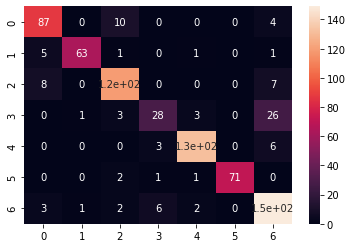

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.array(tstdata["label"].values), y_SVC_pred)
sns.heatmap(conf_mat,annot=True)

<AxesSubplot:>

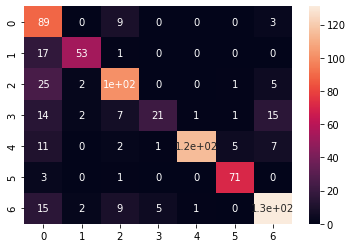

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.array(tstdata["label"].values), y_knn_pred)
sns.heatmap(conf_mat,annot=True)

c) Do you think you can maximize both Precision and Recall for a model? What
do you think will be a better metric to judge a model?

d) A bridge in Raipur is unstable and we want to avoid fatalities. Trucks and
Buses should be stopped while motorbikes and bicycles can be allowed. Which
of your 2 models do you think will be better for this task? Explain with the help of
Precision/Recall, ROC curve and AUC.

In [ ]:
list_of_classes=['bicycle','motorbus', 'motorcycle','truck']
df1=trdata[trdata['target']=="bicycle"]
df2=trdata[trdata['target']=="motorcycle"]
df3=trdata[trdata['target']=="motorbus"]
df4=trdata[trdata['target']=="truck"]
tempdf=pd.concat([df1,df2,df3,df4],ignore_index=True)


In [ ]:
tempdf["target"].value_counts()

truck         656
motorcycle    592
bicycle       304
motorbus      256
Name: target, dtype: int64

In [ ]:
def tempf(target):
    if target=="motorcycle" or target=="bicycle":
        return 0
    else:
        return 1
tempdf["ext_label"]=tempdf["target"].apply(tempf)

In [ ]:
tempdf["ext_label"].value_counts()

1    912
0    896
Name: ext_label, dtype: int64

In [ ]:
for train_idx, test_idx in kfold.split(tempdf["ch_nor_gimg"],tempdf["ext_label"]):
    test = tempdf.loc[test_idx]
    train = tempdf.loc[train_idx]
    knn.fit(np.stack(train["ch_nor_gimg"].values),train["ext_label"])
    y_knn_pred=knn.predict(np.stack(test["ch_nor_gimg"].values))
    acknn=accuracy_score(np.array(test["ext_label"].values), y_knn_pred)


    svc1.fit(np.stack(train["ch_nor_gimg"].values),train["ext_label"])
    y_SVC_pred = svc1.predict(np.stack(test["ch_nor_gimg"].values))
    accSVC=accuracy_score(np.array(test["ext_label"].values),y_SVC_pred)
    print(f"KNN-Classifier accuracy is {acknn*100}")
    print(f"SVC-Accuracy is {accSVC*100}")
    break

KNN-Classifier accuracy is 91.71270718232044
SVC-Accuracy is 92.26519337016575


From the above analysis SVC is giving little higher accuracy compared to KNN.

In [ ]:
confusion_matrix(np.array(test['ext_label'].values), y_knn_pred)

array([[167,  13],
       [ 17, 165]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(f"classification report for knn is\n {classification_report(np.array(test['ext_label'].values), y_knn_pred)}")

classification report for knn is
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       180
           1       0.93      0.91      0.92       182

    accuracy                           0.92       362
   macro avg       0.92      0.92      0.92       362
weighted avg       0.92      0.92      0.92       362



In [ ]:
print(f"classification report for SVC is \n{classification_report(np.array(test['ext_label'].values), y_SVC_pred)}")

classification report for SVC is 
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       180
           1       0.89      0.97      0.93       182

    accuracy                           0.92       362
   macro avg       0.93      0.92      0.92       362
weighted avg       0.93      0.92      0.92       362



In [ ]:
from sklearn.model_selection import cross_val_predict
cross_val_score=cross_val_predict(svc1,np.stack(tempdf["ch_nor_gimg"].values),tempdf["ext_label"].values,method="decision_function")


In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(tempdf["ext_label"].values,cross_val_score)


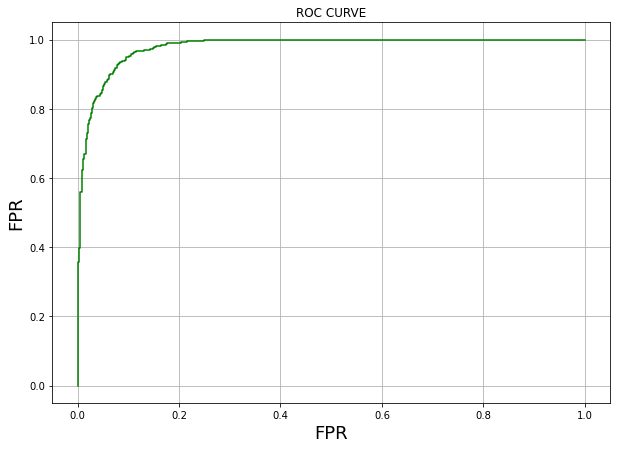

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,"g")
plt.title("ROC CURVE")
plt.xlabel("FPR",fontdict={'size':18})
plt.ylabel("FPR",fontdict={'size':18})
plt.grid()
plt.show()


e) Find the Micro and Macro F1 Score of both of your models and comment on
which is better and why.


In [ ]:
from sklearn.metrics import f1_score
f1_SVC=f1_score(np.array(test['ext_label'].values), y_SVC_pred,average="micro")
print(f" micro f1 score for svc is {f1_SVC}")
f2_SVC=f1_score(np.array(test['ext_label'].values), y_SVC_pred,average="macro")
print(f" macro f1 score for svc is {f2_SVC}")
f3_SVC=f1_score(np.array(test['ext_label'].values), y_knn_pred,average="micro")
print(f" micro f1 score for knn is {f3_SVC}")
f4_SVC=f1_score(np.array(test['ext_label'].values), y_knn_pred,average="macro")
print(f" macro f1 score for knn is {f4_SVC}")


 micro f1 score for svc is 0.9226519337016574
 macro f1 score for svc is 0.9224151128256943
 micro f1 score for knn is 0.9171270718232044
 macro f1 score for knn is 0.9171245421245421


### 7. Write a function to create a random 3x3 captcha matrix and ask the user to label the class with maximum number of examples. Estimate how often your best model will be able to solve the captcha problem correctly.


In [ ]:
svc1.fit(np.stack(trdata["ch_nor_gimg"].values),trdata["label"])

SVC()

Enter the index values of the vehicle with maximum examples in the below captcha 
        after completion of selection please enter 9


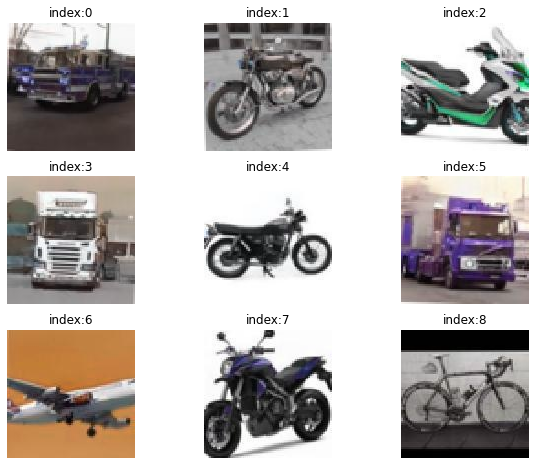

In [ ]:
def captcha(df):
    fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(10,8))
    global t
    t=df.sample(9).reset_index()
    global ans
    ans=t["target"].value_counts(sort=True).idxmax()
    rand_int=np.random.randint(0,8)
    print(f"Enter the index values of the vehicle with maximum examples in the below captcha \n        after completion of selection please enter 9")
    k=-1
    for i in range(3):
        for j in range(3):
            k+=1
            img=cv2.imread(t["path"].iloc[k])
            axes[i,j].imshow(img)
            axes[i,j].axis("off")
            axes[i,j].set_title(f"index:{k}")
captcha(trdata)



In [ ]:
a=[]
while True:
    a.append(int(input("enter index")))
    if(a[-1]==9):
        break


enter index4
enter index9


In [ ]:
a.pop()
pred_by_human=np.stack(t["label"].iloc[a].values)
print(pred_by_human)

[4]


In [ ]:
ypred_by_model=svc1.predict(np.stack(t["ch_nor_gimg"].iloc[a].values))
print(ypred_by_model)
count=np.sum(ypred_by_model==pred_by_human)
print(f"Model predicted {count}/{len(ypred_by_model)}correctly")

[4]
Model predicted 1/1correctly
